# IMPORT MODULES

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Processing, create I/O
import os
import cv2
import numpy as np
import pickle
import PIL
import shutil
import time
import pandas as pd
from PIL import Image
from sklearn import neighbors, datasets
from ctypes import sizeof
import fnmatch
import tensorflow
# Show progress bar
from tqdm.notebook import tqdm
# Optimizers
from keras import optimizers
# Model
from keras.models import Model
from keras.models import Sequential
# Layers
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
# Load dataset
from tensorflow.keras.utils import image_dataset_from_directory
# Models
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras import layers, Model, utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
# Metrics
from sklearn.metrics import confusion_matrix,accuracy_score, f1_score, precision_score, recall_score
# Train test split
from sklearn.model_selection import train_test_split
# Optimize
from sklearn.model_selection import GridSearchCV
# Visualize
import matplotlib.pyplot as plt
import seaborn as sn

# LOAD DATA

## MACHINE LEARNING DATA

In [ ]:
def get_data(adware_path, benign_path):
  adware = [] 
  benign =[]
  for image_adware in tqdm(os.listdir(adware_path)): 
    path = os.path.join(adware_path, image_adware)
    img1 = cv2.imread(path) 
    img1 = cv2.resize(img1, (224, 224)).flatten()
    adware.append(img1)
  for image_benign in tqdm(os.listdir(benign_path)): 
    path = os.path.join(benign_path, image_benign)
    img2 = cv2.imread(path) 
    img2 = cv2.resize(img2, (224, 224)).flatten()
    benign.append(img2) 
  data = np.concatenate((np.asarray(adware),np.asarray(benign)),axis=0)
  return data

In [ ]:
X_train_MNL = get_data("/content/drive/MyDrive/01_Quản lý thông tin/[Quản lý thông tin - IE103.N22] Đồ án nhóm/DATA/Data/Data_Train/Adware_Train", "/content/drive/MyDrive/01_Quản lý thông tin/[Quản lý thông tin - IE103.N22] Đồ án nhóm/DATA/Data/Data_Train/Benign_Train")

  0%|          | 0/1217 [00:00<?, ?it/s]

  0%|          | 0/1365 [00:00<?, ?it/s]

In [ ]:
X_test_MNL = get_data("/content/drive/MyDrive/01_Quản lý thông tin/[Quản lý thông tin - IE103.N22] Đồ án nhóm/DATA/Data/Data_Test/Adware_Test", "/content/drive/MyDrive/01_Quản lý thông tin/[Quản lý thông tin - IE103.N22] Đồ án nhóm/DATA/Data/Data_Test/Benign_Test")

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

In [ ]:
X_val_MNL = get_data("/content/drive/MyDrive/01_Quản lý thông tin/[Quản lý thông tin - IE103.N22] Đồ án nhóm/DATA/Data/Data_Val/Adware_Val", "/content/drive/MyDrive/01_Quản lý thông tin/[Quản lý thông tin - IE103.N22] Đồ án nhóm/DATA/Data/Data_Val/Benign_Val")

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

In [ ]:
z = np.zeros(len(os.listdir("/content/drive/MyDrive/01_Quản lý thông tin/[Quản lý thông tin - IE103.N22] Đồ án nhóm/DATA/Data/Data_Train/Adware_Train"),)).reshape(-1,1)
o = np.ones(len(os.listdir("/content/drive/MyDrive/01_Quản lý thông tin/[Quản lý thông tin - IE103.N22] Đồ án nhóm/DATA/Data/Data_Train/Benign_Train"),)).reshape(-1,1)
y_train = np.concatenate((z, o), axis=0)
z1 = np.zeros(len(os.listdir("/content/drive/MyDrive/01_Quản lý thông tin/[Quản lý thông tin - IE103.N22] Đồ án nhóm/DATA/Data/Data_Val/Adware_Val"),)).reshape(-1,1)
o1 = np.ones(len(os.listdir("/content/drive/MyDrive/01_Quản lý thông tin/[Quản lý thông tin - IE103.N22] Đồ án nhóm/DATA/Data/Data_Val/Benign_Val"),)).reshape(-1,1)
y_val = np.concatenate((z1, o1), axis=0)
z2 = np.zeros(len(os.listdir("/content/drive/MyDrive/01_Quản lý thông tin/[Quản lý thông tin - IE103.N22] Đồ án nhóm/DATA/Data/Data_Test/Adware_Test"),)).reshape(-1,1)
o2 = np.ones(len(os.listdir("/content/drive/MyDrive/01_Quản lý thông tin/[Quản lý thông tin - IE103.N22] Đồ án nhóm/DATA/Data/Data_Test/Benign_Test"),)).reshape(-1,1)
y_test = np.concatenate((z2, o2), axis=0)

# DISCOVER DATA

## DATA INFO

In [ ]:
path_data_train_adware = '/content/drive/MyDrive/01_Quản lý thông tin/[Quản lý thông tin - IE103.N22] Đồ án nhóm/DATA/Data/Data_Train/Adware_Train'
path_data_train_benign = '/content/drive/MyDrive/01_Quản lý thông tin/[Quản lý thông tin - IE103.N22] Đồ án nhóm/DATA/Data/Data_Train/Benign_Train'
print("Adware train: ",len(os.listdir(path_data_train_adware)))
print("Benign train: ",len(os.listdir(path_data_train_benign)))

Adware train:  1217
Benign train:  1365


In [ ]:
len(os.listdir('/content/drive/MyDrive/01_Quản lý thông tin/[Quản lý thông tin - IE103.N22] Đồ án nhóm/DATA/Data/Data_Test/Benign_Test'))

160

In [ ]:
path_data_test_adware = '/content/drive/MyDrive/01_Quản lý thông tin/[Quản lý thông tin - IE103.N22] Đồ án nhóm/DATA/Data/Data_Test/Adware_Test'
path_data_test_benign = '/content/drive/MyDrive/01_Quản lý thông tin/[Quản lý thông tin - IE103.N22] Đồ án nhóm/DATA/Data/Data_Test/Benign_Test'
print("Adware test: ",len(os.listdir(path_data_test_adware)))
print("Benign test: ",len(os.listdir(path_data_test_benign)))

Adware test:  150
Benign test:  160


In [ ]:
path_data_val_adware = '/content/drive/MyDrive/01_Quản lý thông tin/[Quản lý thông tin - IE103.N22] Đồ án nhóm/DATA/Data/Data_Val/Adware_Val'
path_data_val_benign = '/content/drive/MyDrive/01_Quản lý thông tin/[Quản lý thông tin - IE103.N22] Đồ án nhóm/DATA/Data/Data_Val/Benign_Val'
print("Adware val: ",len(os.listdir(path_data_val_adware)))
print("Benign val: ",len(os.listdir(path_data_val_benign)))

Adware val:  150
Benign val:  160


## VISUALIZE

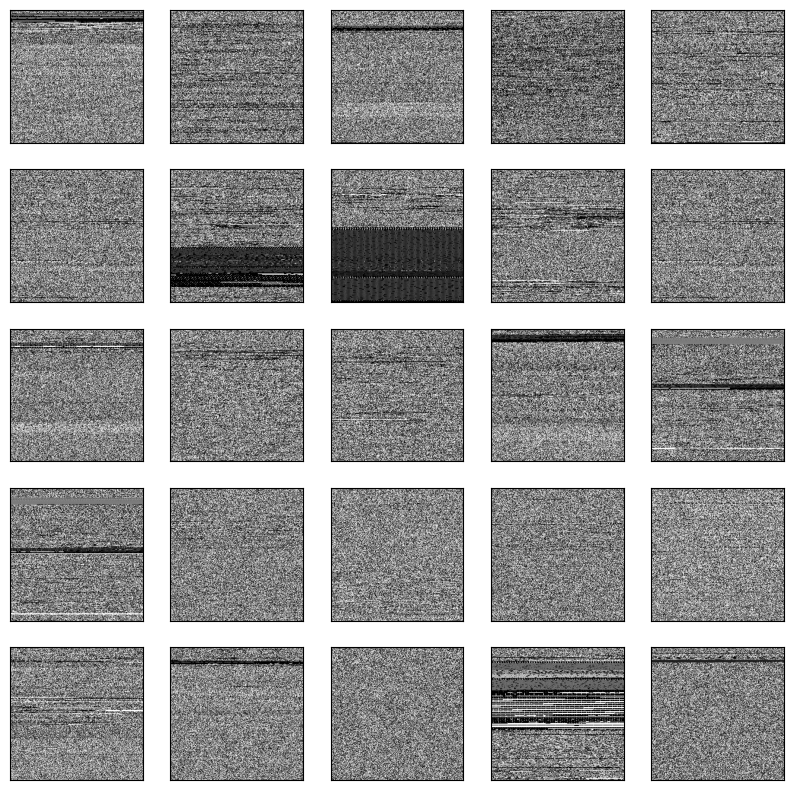

In [ ]:
plt.figure(figsize=(10, 10))
file_list = os.listdir('/content/drive/MyDrive/01_Quản lý thông tin/[Quản lý thông tin - IE103.N22] Đồ án nhóm/DATA/Data/Data_Test/Adware_Test')
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([]) 
  plt.yticks([])
  plt.grid(False)
  img = Image.open(os.path.join('/content/drive/MyDrive/01_Quản lý thông tin/[Quản lý thông tin - IE103.N22] Đồ án nhóm/DATA/Data/Data_Test/Adware_Test', file_list[i]))
  plt.imshow(img, cmap = plt.cm.binary)
plt.show()

# TRAIN MODEL

## Logistic Regression

In [ ]:
model_lr = LogisticRegression()
model_lr.fit(X_train_MNL, y_train)


Test_Accuracy_score= model_lr.score(X_val_MNL, y_val)

print("accuracy score in test =%.2f%%\n" % (Test_Accuracy_score*100))

y_pred = model_lr.predict(X_val_MNL)
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred, digits=4))

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy score in test =60.65%

              precision    recall  f1-score   support

         0.0     0.5972    0.5733    0.5850       150
         1.0     0.6145    0.6375    0.6258       160

    accuracy                         0.6065       310
   macro avg     0.6058    0.6054    0.6054       310
weighted avg     0.6061    0.6065    0.6061       310



Tìm tham số hợp lý cho Logistic RegressionRegression

In [ ]:
#Tuning hyparameters of Logistic Regression
grid_param = {"C": [0.001,0.01,0.1,1,10], "penalty": ['l1', 'l2']}
lr_grid = GridSearchCV(estimator=LogisticRegression(solver='liblinear'), param_grid=grid_param, cv= 2,scoring='f1_macro',verbose=3)

lr_grid.fit(X_train_MNL, y_train)

print(lr_grid.best_params_)
print(lr_grid.best_score_)
lr_grid.best_params_

Fitting 2 folds for each of 10 candidates, totalling 20 fits


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/2] END ...............C=0.001, penalty=l1;, score=0.788 total time=  30.8s


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/2] END ...............C=0.001, penalty=l1;, score=0.803 total time=  23.4s


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/2] END ...............C=0.001, penalty=l2;, score=0.625 total time=  44.1s


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/2] END ...............C=0.001, penalty=l2;, score=0.623 total time=  52.1s


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/2] END ................C=0.01, penalty=l1;, score=0.787 total time=  25.1s


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/2] END ................C=0.01, penalty=l1;, score=0.798 total time=  23.8s


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/2] END ................C=0.01, penalty=l2;, score=0.627 total time=  44.6s


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/2] END ................C=0.01, penalty=l2;, score=0.625 total time=  52.3s


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/2] END .................C=0.1, penalty=l1;, score=0.777 total time=  26.0s


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/2] END .................C=0.1, penalty=l1;, score=0.808 total time=  26.1s


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/2] END .................C=0.1, penalty=l2;, score=0.626 total time=  44.6s


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/2] END .................C=0.1, penalty=l2;, score=0.626 total time=  52.4s


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/2] END ...................C=1, penalty=l1;, score=0.780 total time=  31.5s


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/2] END ...................C=1, penalty=l1;, score=0.755 total time=  28.0s


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/2] END ...................C=1, penalty=l2;, score=0.626 total time=  44.4s


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/2] END ...................C=1, penalty=l2;, score=0.626 total time=  51.6s


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/2] END ..................C=10, penalty=l1;, score=0.748 total time=  33.7s


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/2] END ..................C=10, penalty=l1;, score=0.778 total time=  31.9s


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/2] END ..................C=10, penalty=l2;, score=0.626 total time=  45.1s


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/2] END ..................C=10, penalty=l2;, score=0.626 total time=  52.2s


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
import pickle

# save
with open('/content/drive/MyDrive/model_logistic.pkl','wb') as f:
    pickle.dump(lr_grid,f)

In [ ]:
y_val_predict=lr_grid.predict(X_val_MNL)


In [ ]:
y_pred = lr_grid.predict(X_test_MNL)
print(classification_report(y_test, y_pred, digits=4))

------

In [ ]:
model_LGR = LogisticRegression(C = 0.01, max_iter = 100, random_state = 42, solver = "saga")
model_LGR.fit(X_train_MNL,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=0.01, random_state=42, solver='saga')

In [ ]:
y_predict = model_LGR.predict(X_test_MNL)
print("Accuracy: ",accuracy_score(y_predict,y_test))

Accuracy:  0.5967741935483871


In [ ]:
print("Accuracy: {}".format(accuracy_score(y_test, y_predict)*100))
print("Precision: {}".format(precision_score(y_test, y_predict)*100))
print("Recall: {}".format(recall_score(y_test, y_predict)*100))
print("F1: {}".format(f1_score(y_test, y_predict)*100))

Accuracy: 59.67741935483871
Precision: 58.29383886255924
Recall: 76.875
F1: 66.30727762803235


Text(95.72222222222221, 0.5, 'True')

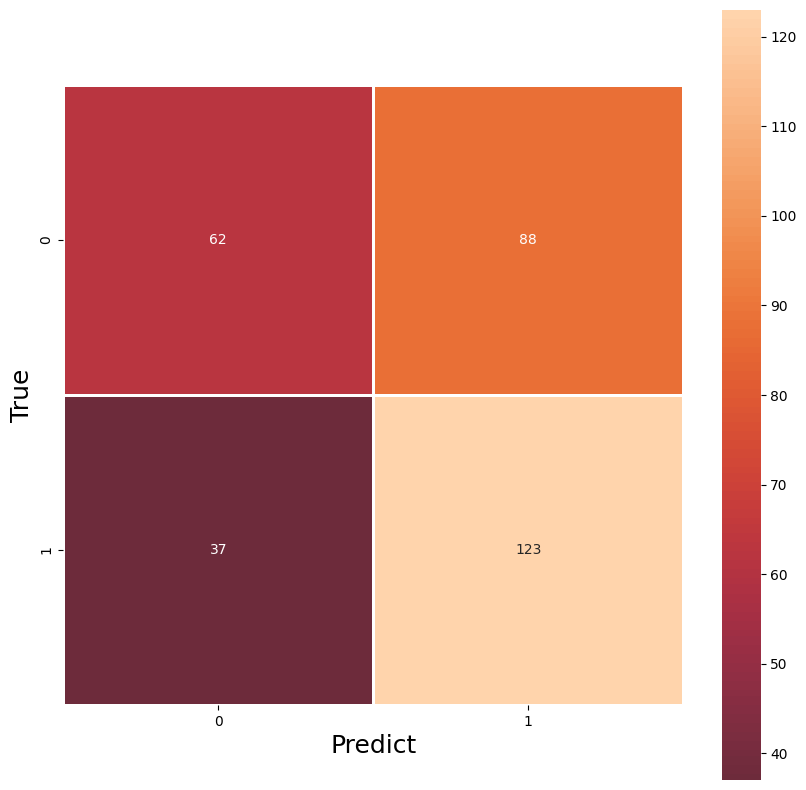

In [ ]:
cf = confusion_matrix(y_test, y_predict)
fig = plt.subplots(nrows = 1, ncols = 1, figsize= (10,10))
sn.heatmap(cf, center = 0, square = True, linewidth = 2, fmt = 'd', annot = True)
plt.xlabel("Predict", fontsize = 18)
plt.ylabel("True", fontsize = 18)

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_train_MNL, y_train)

Test_Accuracy_score= model_knn.score(X_val_MNL, y_val)

print("accuracy score in test =%.2f%%\n" % (Test_Accuracy_score*100))
from sklearn.metrics import classification_report

y_pred = model_knn.predict(X_val_MNL)
print(classification_report(y_val, y_pred, digits=4))

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


accuracy score in test =36.45%

              precision    recall  f1-score   support

         0.0     0.3206    0.2800    0.2989       150
         1.0     0.3966    0.4437    0.4189       160

    accuracy                         0.3645       310
   macro avg     0.3586    0.3619    0.3589       310
weighted avg     0.3599    0.3645    0.3608       310



Tim tham so phu hop

In [ ]:
#Tuning hyparameters of KNN
grid_param = {'n_neighbors': list(range(2,5)), 'p': [1, 2]}

KNN_grid = GridSearchCV(estimator= model_knn, param_grid=grid_param,  cv=2,  scoring='f1_macro', verbose = 3)

KNN_grid.fit(X_train_MNL, y_train)

print(KNN_grid.best_params_)

Fitting 2 folds for each of 6 candidates, totalling 12 fits


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 1/2] END ................n_neighbors=2, p=1;, score=0.475 total time= 4.4min


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 2/2] END ................n_neighbors=2, p=1;, score=0.339 total time= 4.6min


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 1/2] END ................n_neighbors=2, p=2;, score=0.444 total time=  18.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 2/2] END ................n_neighbors=2, p=2;, score=0.325 total time=  18.2s


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 1/2] END ................n_neighbors=3, p=1;, score=0.372 total time= 4.4min


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 2/2] END ................n_neighbors=3, p=1;, score=0.359 total time= 4.3min


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 1/2] END ................n_neighbors=3, p=2;, score=0.360 total time=  17.6s


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 2/2] END ................n_neighbors=3, p=2;, score=0.326 total time=  18.4s


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 1/2] END ................n_neighbors=4, p=1;, score=0.483 total time= 4.4min


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 2/2] END ................n_neighbors=4, p=1;, score=0.342 total time= 4.4min


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 1/2] END ................n_neighbors=4, p=2;, score=0.432 total time=  18.8s


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV 2/2] END ................n_neighbors=4, p=2;, score=0.322 total time=  17.6s
{'n_neighbors': 4, 'p': 1}


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:

# save
with open('/content/drive/MyDrive/model_KNN.pkl','wb') as f:
    pickle.dump(KNN_grid,f)

chay model

In [ ]:
y_pred = KNN_grid.predict(X_test_MNL)
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

         0.0     0.4908    0.7133    0.5815       150
         1.0     0.5326    0.3063    0.3889       160

    accuracy                         0.5032       310
   macro avg     0.5117    0.5098    0.4852       310
weighted avg     0.5124    0.5032    0.4821       310



------

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train_MNL, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
y_pred = model_KNN.predict(X_test_MNL)

In [ ]:
print("Accuracy: {}".format(accuracy_score(y_test, y_pred)*100))
print("Precision: {}".format(precision_score(y_test, y_pred)*100))
print("Recall: {}".format(recall_score(y_test, y_pred)*100))
print("F1: {}".format(f1_score(y_test, y_pred)*100))

Accuracy: 46.774193548387096
Precision: 48.717948717948715
Recall: 59.375
F1: 53.52112676056338


Text(95.72222222222221, 0.5, 'True')

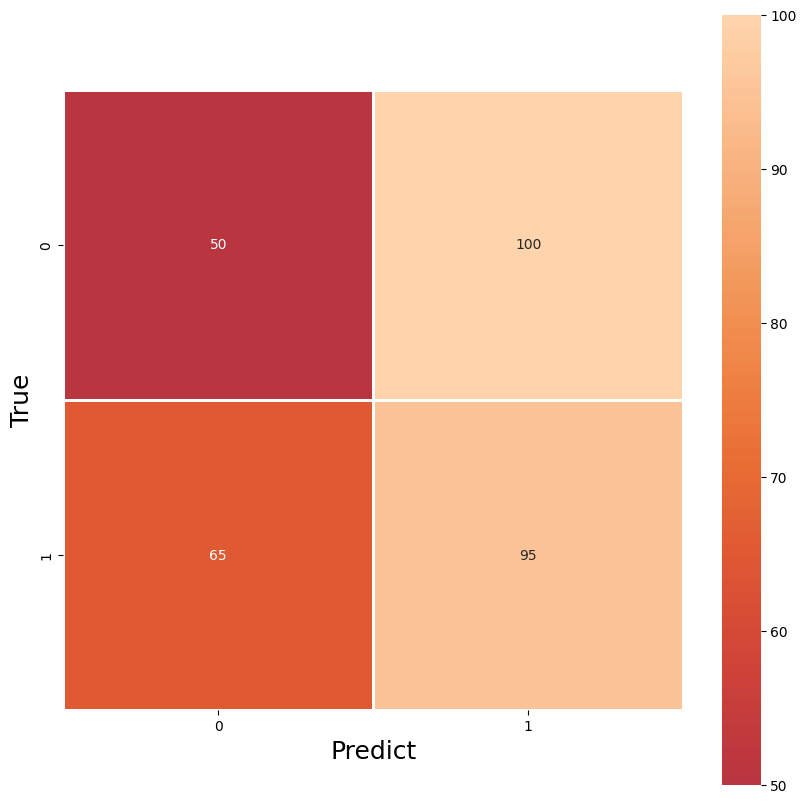

In [ ]:
cf = confusion_matrix(y_test, y_pred)
fig = plt.subplots(nrows = 1, ncols = 1, figsize= (10,10))
sn.heatmap(cf, center = 0, square = True, linewidth = 2, fmt = 'd', annot = True)
plt.xlabel("Predict", fontsize = 18)
plt.ylabel("True", fontsize = 18)

# DEEP LEARNING DATA

In [ ]:
def get_data_DL(adware_path, benign_path):
  adware = [] 
  benign =[]
  for image_adware in tqdm(os.listdir(adware_path)): 
    path = os.path.join(adware_path, image_adware)
    img1 = cv2.imread(path) 
    img1 = cv2.resize(img1, (224, 224))
    adware.append(img1)
  for image_benign in tqdm(os.listdir(benign_path)): 
    path = os.path.join(benign_path, image_benign)
    img2 = cv2.imread(path) 
    img2 = cv2.resize(img2, (224, 224))
    benign.append(img2) 
  data = np.concatenate((np.asarray(adware),np.asarray(benign)),axis=0)
  return data

In [ ]:
X_train_DL = get_data_DL("/content/drive/MyDrive/01_Quản lý thông tin/[Quản lý thông tin - IE103.N22] Đồ án nhóm/DATA/Data/Data_Train/Adware_Train", "/content/drive/MyDrive/01_Quản lý thông tin/[Quản lý thông tin - IE103.N22] Đồ án nhóm/DATA/Data/Data_Train/Benign_Train")

  0%|          | 0/1217 [00:00<?, ?it/s]

  0%|          | 0/1365 [00:00<?, ?it/s]

In [ ]:
X_test_DL = get_data_DL("/content/drive/MyDrive/01_Quản lý thông tin/[Quản lý thông tin - IE103.N22] Đồ án nhóm/DATA/Data/Data_Test/Adware_Test", "/content/drive/MyDrive/01_Quản lý thông tin/[Quản lý thông tin - IE103.N22] Đồ án nhóm/DATA/Data/Data_Test/Benign_Test")

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

In [ ]:
X_val_DL = get_data_DL("/content/drive/MyDrive/01_Quản lý thông tin/[Quản lý thông tin - IE103.N22] Đồ án nhóm/DATA/Data/Data_Val/Adware_Val", "/content/drive/MyDrive/01_Quản lý thông tin/[Quản lý thông tin - IE103.N22] Đồ án nhóm/DATA/Data/Data_Val/Benign_Val")

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

----------------------------

# Tang cuong du lieu

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory
train_generator = image_dataset_from_directory("/content/drive/MyDrive/01_Quản lý thông tin/CODE/DATA/Data/Data_Train",image_size=(224,224),batch_size=32,shuffle=True)
test_generator = image_dataset_from_directory("/content/drive/MyDrive/01_Quản lý thông tin/CODE/DATA/Data/Data_Test",image_size=(224,224),batch_size=32,shuffle=False)

Found 2582 files belonging to 2 classes.
Found 310 files belonging to 2 classes.


In [ ]:
arr_0=np.zeros(len(os.listdir(path_data_test_adware),)).reshape(-1,1)
print(arr_0.shape)
arr_1=np.ones(len(os.listdir(path_data_test_benign),)).reshape(-1,1)
print(arr_1.shape)
y_test=np.vstack((arr_0,arr_1))
print(y_test.shape)

(150, 1)
(160, 1)
(310, 1)


In [ ]:
arr_0=np.zeros(len(os.listdir(path_data_train_adware),)).reshape(-1,1)
print(arr_0.shape)
arr_1=np.ones(len(os.listdir(path_data_train_benign),)).reshape(-1,1)
print(arr_1.shape)
y_train=np.vstack((arr_0,arr_1))
print(y_train.shape)

(1217, 1)
(1365, 1)
(2582, 1)


# VGG16

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, Model, utils

base_model = VGG16(input_shape = (224, 224, 3), 
include_top = False,
weights = 'imagenet')
for layer in base_model.layers:
  layer.trainable = False

vgg = VGG16(include_top = False, weights = 'imagenet')
for layer in vgg.layers:
   layer.trainable = False

x = layers.Flatten()(base_model.output)
model = tensorflow.keras.models.Model(base_model.input, x)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
x_train = model.predict(train_generator)

81/81 [==============================] - 1477s 18s/step


In [ ]:
x_test = model.predict(test_generator)

10/10 [==============================] - 174s 17s/step


# SVM

In [ ]:
from sklearn.svm import SVC
model1_svc=SVC()
model1_svc.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [ ]:
y_pred=model1_svc.predict(x_test)

In [ ]:
print(accuracy_score(y_test,y_pred)*100)

48.064516129032256


In [ ]:
import sklearn.metrics as metrics
print('F1 Score:', f1_score(y_test, y_pred))

F1 Score: 0.6211764705882352


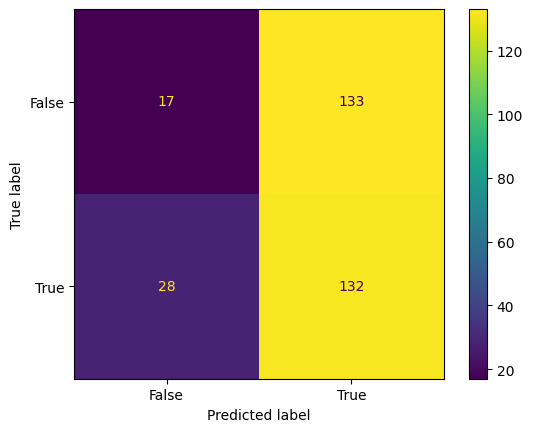

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()